#### Dataset Location

In [2]:
# Dataset: banknotes.csv
# Location: https://mitu.co.in/dataset

#### Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [6]:
df = pd.read_csv('banknotes.csv')

In [8]:
df.shape

(1372, 5)

In [9]:
list(df.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [10]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [11]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### Separate the input and output data

In [13]:
# input data
x = df.drop('Class', axis = 1)

# output data
y = df['Class']

In [14]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [15]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


#### Explore the data

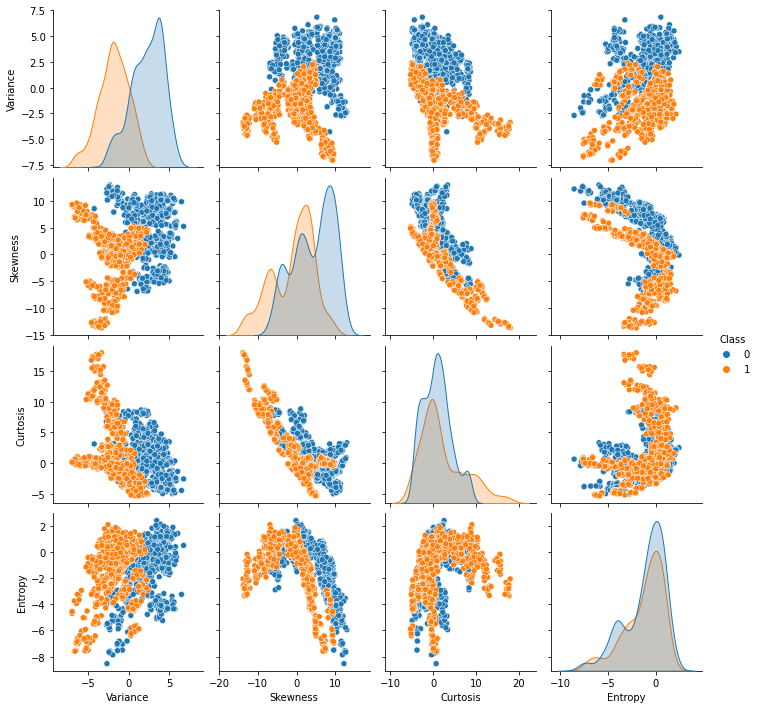

In [17]:
sns.pairplot(df, hue='Class')

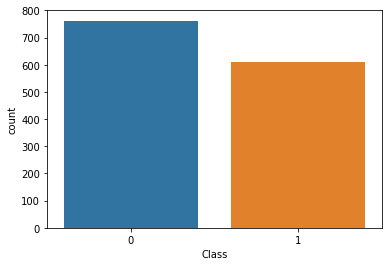

In [20]:
sns.countplot(x = y);

In [21]:
np.unique(y)

array([0, 1])

In [22]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

#### Cross-validation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [26]:
x_train.shape

(1029, 4)

In [27]:
x_test.shape

(343, 4)

#### Build the model

In [29]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

In [30]:
# create the object
clf = DecisionTreeClassifier(random_state=0)

In [31]:
# train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Performance Evaluation

In [34]:
# predict on test / unseen data
y_pred = clf.predict(x_test)

In [35]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [36]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [37]:
result

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [39]:
confusion_matrix(y_test, y_pred)

array([[191,   4],
       [  3, 145]])

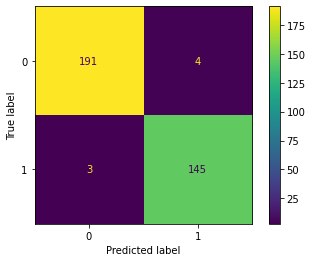

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [41]:
336 / 343

0.9795918367346939

In [42]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



#### Visualize the tree

In [45]:
from sklearn.tree import plot_tree

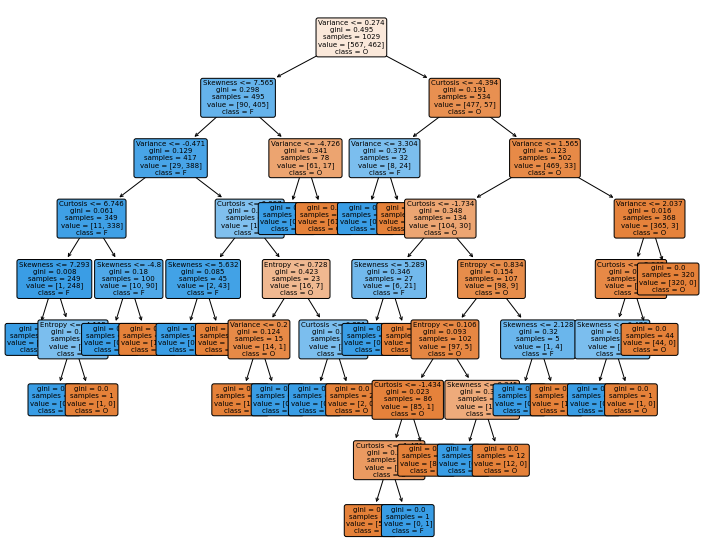

In [49]:
plt.figure(figsize=(12,10))
plot_tree(clf, fontsize=7, filled=True, rounded=True,
         class_names=['O','F'], feature_names=x.columns);

In [50]:
imp  = clf.feature_importances_

In [51]:
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

<BarContainer object of 4 artists>

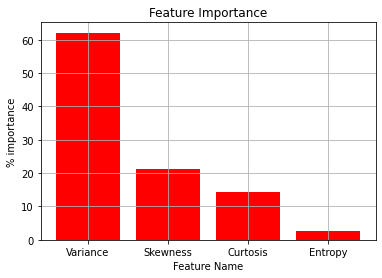

In [53]:
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('% importance')
plt.grid()
plt.bar(x.columns, imp * 100, color = 'r')

#### Predict for new values

In [54]:
new1 = [[4.8906, -3.3584, 3.4202, 1.0905]]
new2 = [[-4.0214, -12.8006, 15.6199, -0.95647]]

In [57]:
clf.predict(new1)[0]

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [58]:
clf.predict(new2)[0]

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1